<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Customer Churn Prediction Using Artificial Neural Networks (ANN) 🕵🏻 <br><h1>

**- Customer churn** refers to the loss of customers or clients over a specific period. 


It is a critical issue for businesses across various industries because it helps them retain customers, maintain revenue and profitability, improve customer satisfaction and loyalty, and gain a competitive advantage in the market.

**- The Project goal**- predict the bank customers who are most likely to be churned using the Artificial Neural Network (ANN).

***- Data description:***


The features in the given dataset are:

**rownumber:** Row Numbers from 1 to 10000.

**customerid:** A unique ID that identifies each customer.

**surname:** The customer’s surname.

**creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.

**geography:** The country from which the customer belongs to.

**Gender:** The customer’s gender: Male, Female

**Age:** The customer’s current age, in years, at the time of being customer.

**tenure:** The number of years for which the customer has been with the bank.

**balance:** Bank balance of the customer.

**numofproducts:** the number of bank products the customer is utilising.

**hascrcard:** The number of credit cards given to the customer by the bank.

**isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")

**exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

**Target feature-**       0: Not churned, 1: Churned

# Improt Libraries & Data

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.float_format = '{:,.2f}'.format

# Importing plotly and cufflinks in offline mode
import plotly.express as px
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)


pd.set_option('display.max_columns', None)
from termcolor import colored
import missingno as msno

import colorama
from colorama import Fore, Style  
from termcolor import colored, cprint
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,RobustScaler

In [2]:
df = pd.read_csv("/Users/nada/Downloads/1-Churn_Modelling.csv")
print(f"Dataframe dimensions: {df.shape}")
df.head()

Dataframe dimensions: (10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


# Exploratory Data Analysis and Visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
#List distinct (unique) values in the CustomerId
df.CustomerId.nunique()

10000

In [5]:
df.duplicated().sum()

0

In [11]:
df.describe()

# Convert the description DataFrame to a formatted table
table = tabulate(description, headers='keys', tablefmt='fancy_grid')
print(table)

╒═══════╤═════════════╤═════════════════╤═══════════════╤════════════╤═════════════╤═══════════╤═════════════════╤═════════════╤══════════════════╤═══════════════════╤══════════════╕
│       │   RowNumber │      CustomerId │   CreditScore │        Age │      Tenure │   Balance │   NumOfProducts │   HasCrCard │   IsActiveMember │   EstimatedSalary │       Exited │
╞═══════╪═════════════╪═════════════════╪═══════════════╪════════════╪═════════════╪═══════════╪═════════════════╪═════════════╪══════════════════╪═══════════════════╪══════════════╡
│ count │    10000    │ 10000           │    10000      │ 10000      │ 10000       │   10000   │    10000        │ 10000       │     10000        │          10000    │ 10000        │
├───────┼─────────────┼─────────────────┼───────────────┼────────────┼─────────────┼───────────┼─────────────────┼─────────────┼──────────────────┼───────────────────┼──────────────┤
│ mean  │     5000.5  │     1.56909e+07 │      650.529  │    38.9218 │     5.0128  │ 

In [13]:
#Drop irrelevant features 
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

**RowNumber** index assigned to each row and has no effect on the output.
It is often automatically generated

**CustomerId** unique identifier assigned to each customer and has no effect on customers leaving the bank.

**Surname** represents the last name or family name of the customers and unlikely to have a direct impact on churn behavior.

In [14]:
print(f"Dataframe dimensions: {df.shape}")
df.head()

Dataframe dimensions: (10000, 11)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


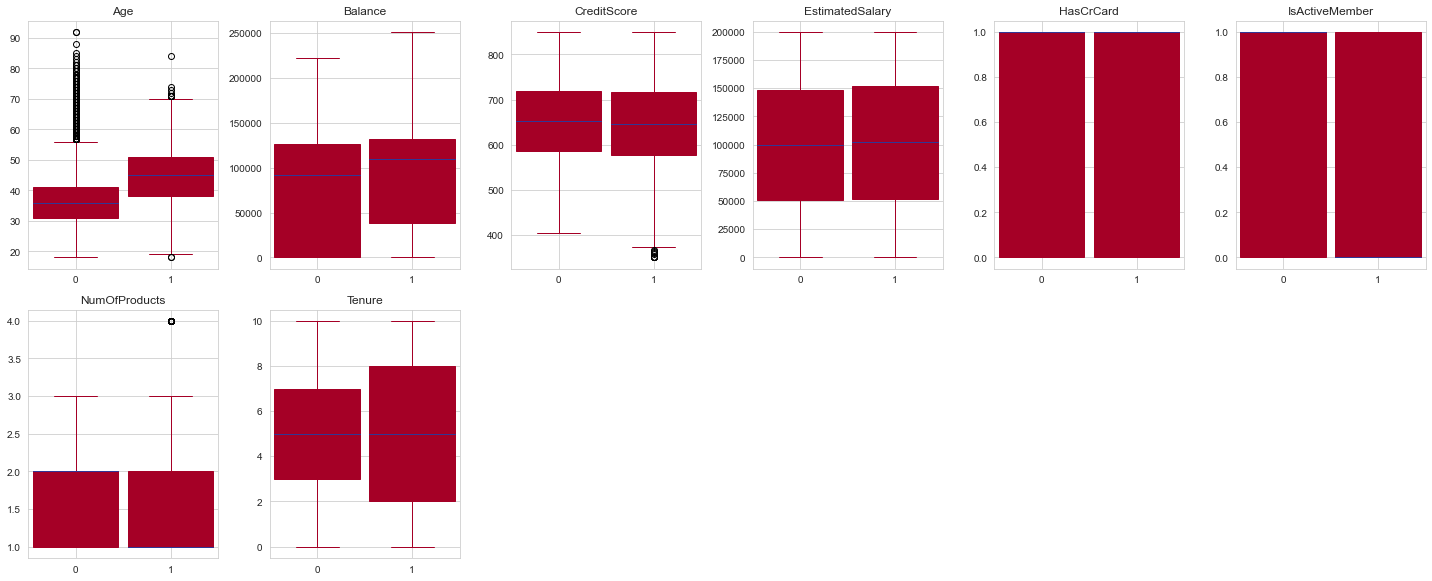

In [31]:
df.plot(kind="box",
        by="Exited",
        layout=(5, 6),
        subplots=True,
        figsize=(20,20),
        cmap="RdYlBu",
        widths=0.9,
        patch_artist=True)
        
plt.tight_layout();

***Visualize the distributions of numeric features***

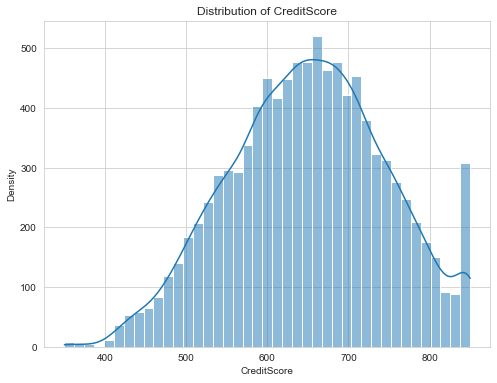

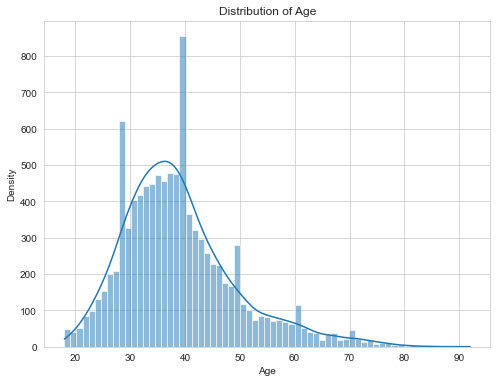

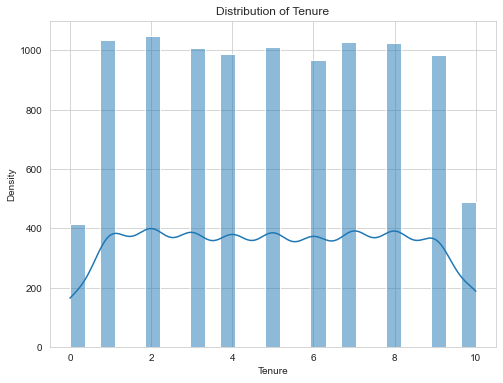

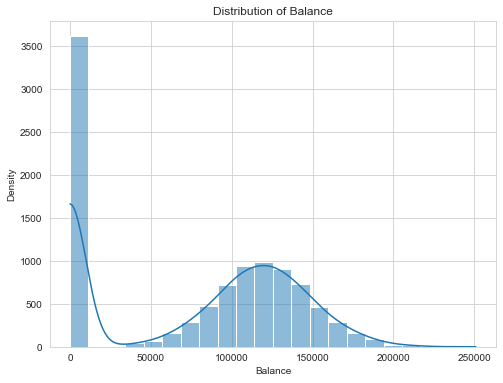

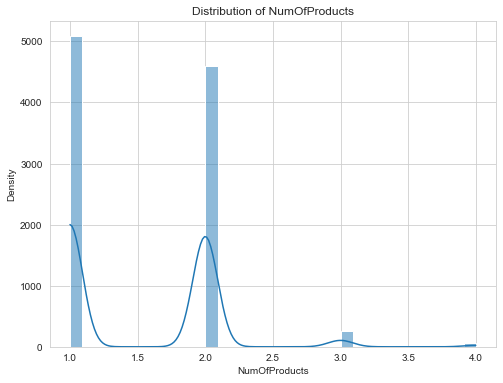

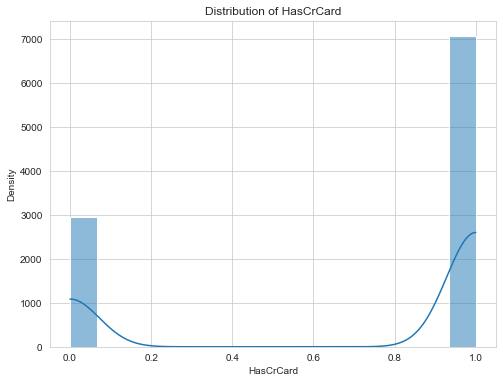

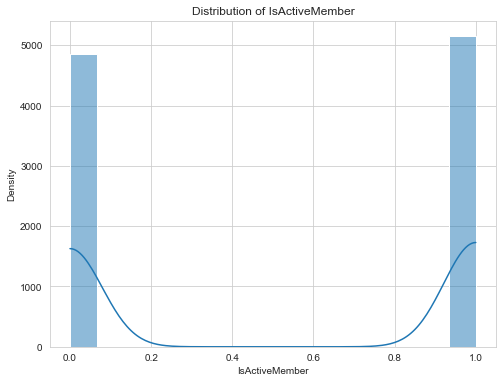

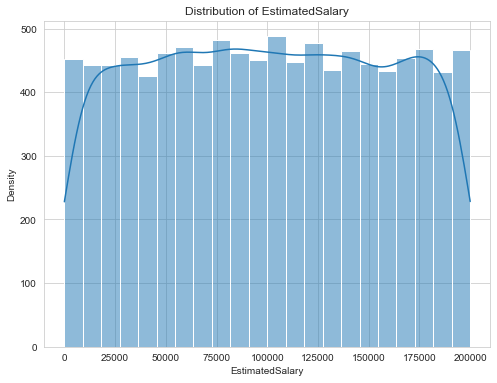

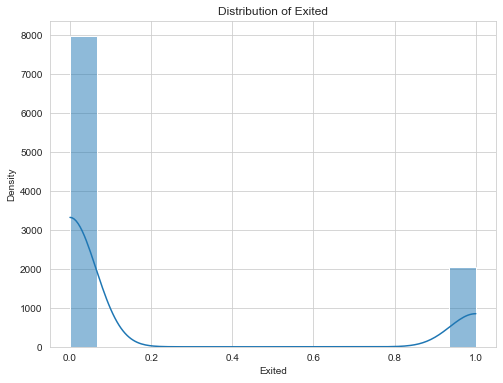

In [32]:
# Select only the numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Plot histograms and kernel density plots for each numeric feature
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.show()

***Visualize the Categorical features***

In [33]:
#summary of descriptive statistics for the categorical columns
df.describe(include=['object'])

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


***There are no sparse classes in these features*** In other words, all the categories in the categorical features have a relatively balanced distribution with a similar number of occurrences.

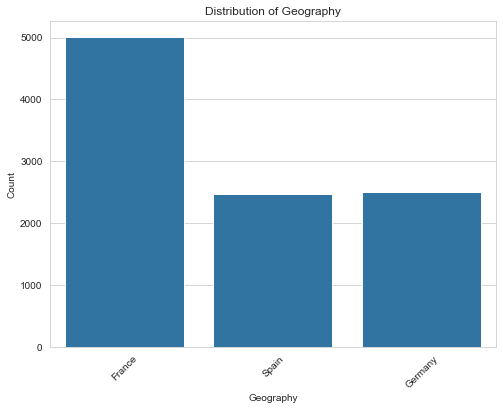

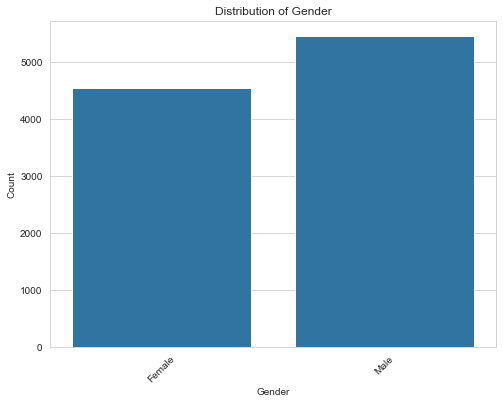

In [34]:
categorical_columns = df.select_dtypes(include=['object'])

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

In [41]:
# Segment "Exited" by gender and display the frequency and percentage within each class
grouped = df.groupby('Gender')['Exited'].agg(Count='value_counts')
grouped

Count
Gender Exited       
Female 0        3404
       1        1139
Male   0        4559
       1         898

In [42]:
# Calculate percentage within each class
dfgp = grouped.groupby(level=[0]).apply(lambda g: round(g * 100 / g.sum(), 2))
dfgp.rename(columns={'Count': 'Percentage'}, inplace=True)
dfgp

Percentage
Gender Exited            
Female 0           74.930
       1           25.070
Male   0           83.540
       1           16.460

In [43]:
dfgeoc = pd.crosstab(df['Geography'], df['Exited'])
dfgeoc

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


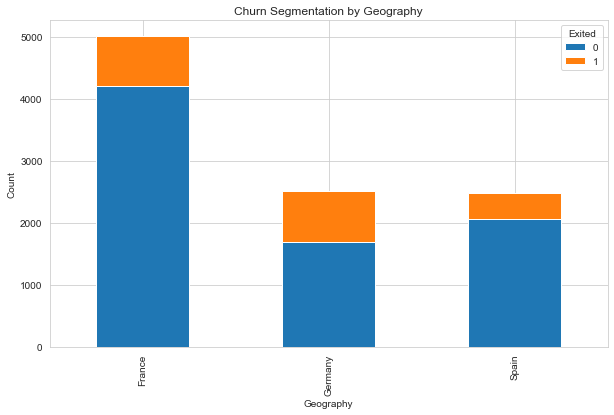

In [44]:
dfgeoc.plot(kind='bar', stacked=True)

plt.title('Churn Segmentation by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.legend(title='Exited')

plt.show()

***Correlations***

In [45]:
# Calculate correlations between numeric features
correlations = df.corr()

# sort features in order of their correlation with "Exited"
sort_corr_cols = correlations.Exited.sort_values(ascending=False).keys()
sort_corr = correlations.loc[sort_corr_cols,sort_corr_cols]
sort_corr

,Exited,Age,Balance,EstimatedSalary,HasCrCard,Tenure,CreditScore,NumOfProducts,IsActiveMember
Exited,1.000,0.285,0.119,0.012,-0.007,-0.014,-0.027,-0.048,-0.156
Age,0.285,1.000,0.028,-0.007,-0.012,-0.010,-0.004,-0.031,0.085
Balance,0.119,0.028,1.000,0.013,-0.015,-0.012,0.006,-0.304,-0.010
EstimatedSalary,0.012,-0.007,0.013,1.000,-0.010,0.008,-0.001,0.014,-0.011
HasCrCard,-0.007,-0.012,-0.015,-0.010,1.000,0.023,-0.005,0.003,-0.012
Tenure,-0.014,-0.010,-0.012,0.008,0.023,1.000,0.001,0.013,-0.028
CreditScore,-0.027,-0.004,0.006,-0.001,-0.005,0.001,1.000,0.012,0.026
NumOfProducts,-0.048,-0.031,-0.304,0.014,0.003,0.013,0.012,1.000,0.010
IsActiveMember,-0.156,0.085,-0.010,-0.011,-0.012,-0.028,0.026,0.010,1.000


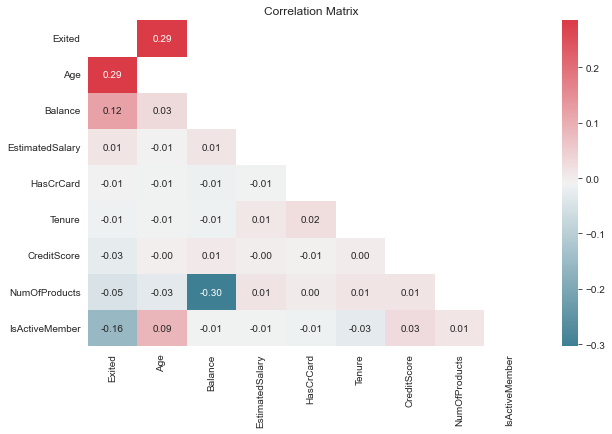

In [46]:
# Calculate correlations between numeric features
correlations = df.corr()

# Sort features based on their correlation with "Exited"
sort_corr_cols = correlations['Exited'].sort_values(ascending=False).index
sort_corr = correlations.loc[sort_corr_cols, sort_corr_cols]

# Set up color map
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Create a masked array to highlight specific values
mask = np.zeros_like(sort_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set specific values to be highlighted
highlight_values = [(0, 1), (1, 0)]  # Example: highlight correlation values of 0 and 1

for i, j in highlight_values:
    mask[i, j] = False
    mask[j, i] = False

# Plot the correlation matrix with color 
sns.heatmap(sort_corr, cmap=cmap, annot=True, fmt=".2f", mask=mask)

plt.title('Correlation Matrix')
plt.show()

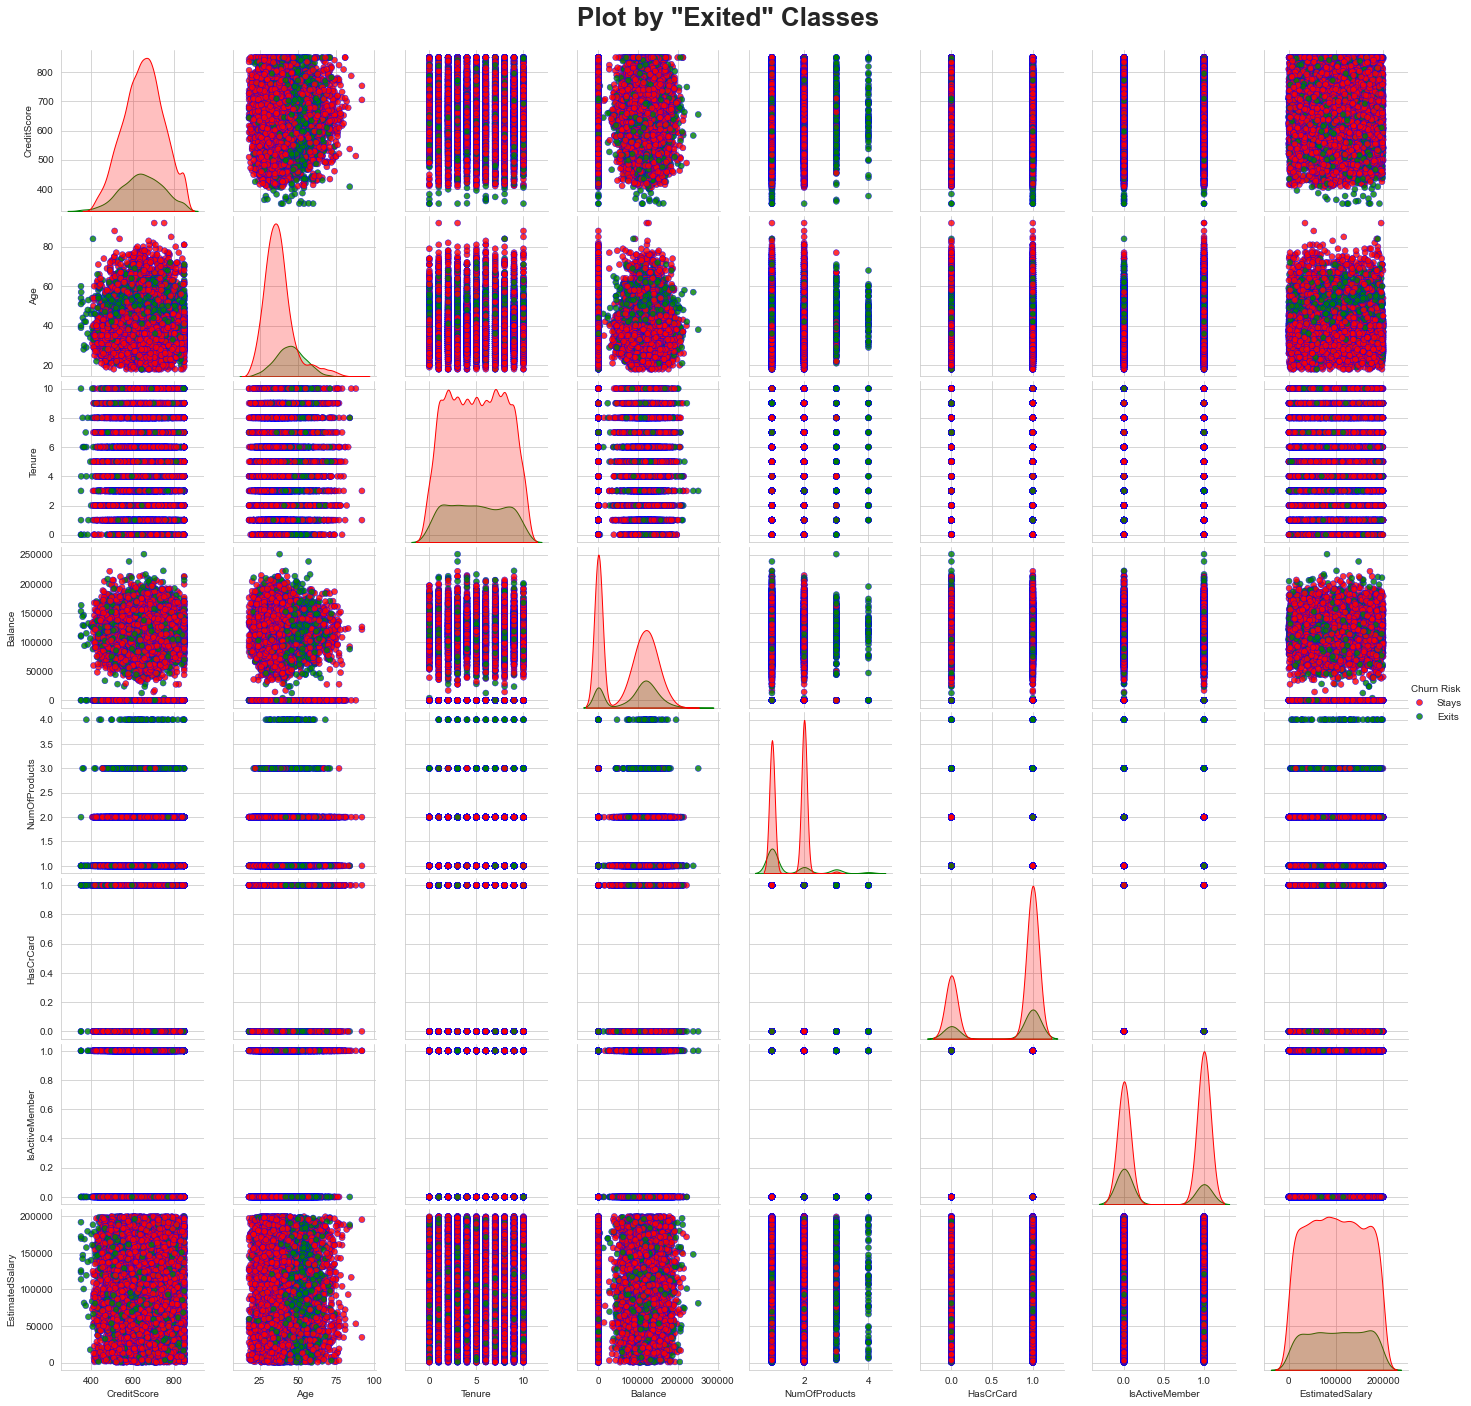

In [47]:
# Plot Seaborn's pairplot
g = sns.pairplot(df, hue='Exited',
                 palette={1 : 'green',
                          0 : 'red'},
                 plot_kws={'alpha' : 0.8, 'edgecolor' : 'b', 'linewidth' : 0.5})

fig = g.fig
fig.subplots_adjust(top=0.95, wspace=0.2)
fig.suptitle('Plot by "Exited" Classes',
             fontsize=26,
             fontweight='bold')


# Update the legend
new_title = 'Churn Risk'
g._legend.set_title(new_title)
# replace labels
new_labels = ['Stays', 'Exits']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.show()

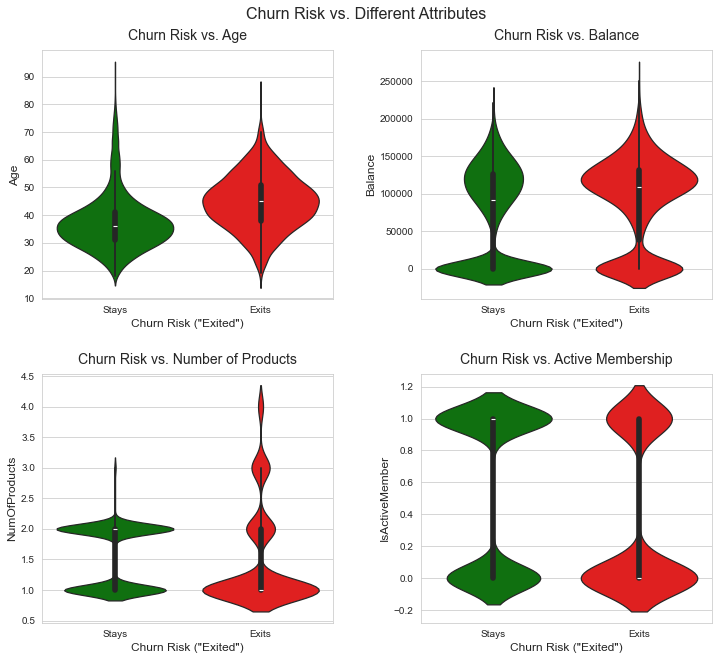

In [48]:
# Segment age by Exited and plot distributions
#  “categorical” variable Exited is a numeric
#  for plotting purposes only we will change it to real categorical variable

# Define palette
my_pal = {'Stays': 'green', 'Exits': 'red'}
# Convert to categorical
hr = {0: 'Stays', 1: 'Exits'}
churn = df['Exited'].map(hr)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Churn Risk vs. Different Attributes', fontsize=16)
fig.subplots_adjust(top=0.92, wspace=0.3, hspace=0.3)

sns.violinplot(x=churn,
               y=df['Age'],
               order=['Stays', 'Exits'], 
               palette=my_pal,
               ax=ax1)

ax1.set_title('Churn Risk vs. Age', fontsize=14, pad=10)
ax1.set_ylabel('Age',size=12)
ax1.set_xlabel('Churn Risk ("Exited")', size=12)

sns.violinplot(x=churn,
               y=df['Balance'],
               order=['Stays', 'Exits'], 
               palette=my_pal,
               ax=ax2)

ax2.set_title('Churn Risk vs. Balance', fontsize=14, pad=10)
ax2.set_ylabel('Balance',size=12)
ax2.set_xlabel('Churn Risk ("Exited")', size=12)

sns.violinplot(x=churn,
               y=df['NumOfProducts'],
               order=['Stays', 'Exits'], 
               palette=my_pal,
               ax=ax3)

ax3.set_title('Churn Risk vs. Number of Products', fontsize=14, pad=10)
ax3.set_ylabel('NumOfProducts',size=12)
ax3.set_xlabel('Churn Risk ("Exited")', size=12)

sns.violinplot(x=churn,
               y=df['IsActiveMember'],
               order=['Stays', 'Exits'], 
               palette=my_pal,
               ax=ax4)

ax4.set_title('Churn Risk vs. Active Membership', fontsize=14, pad=10)
ax4.set_ylabel('IsActiveMember',size=12)
ax4.set_xlabel('Churn Risk ("Exited")', size=12)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


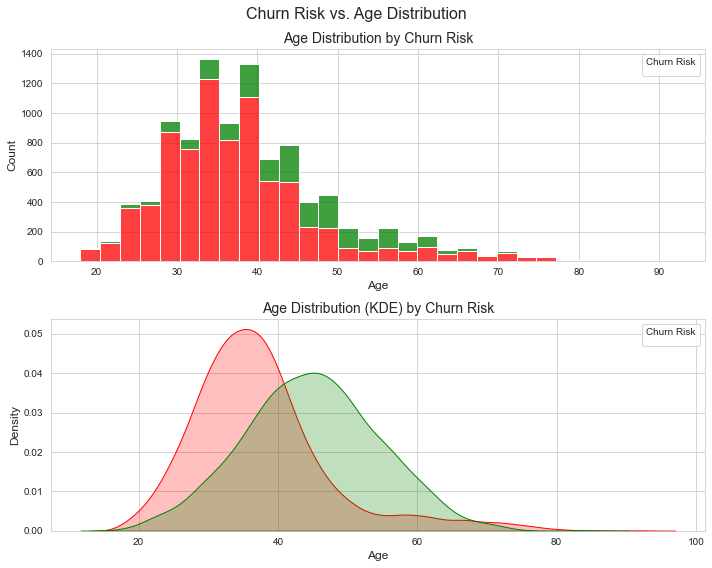

In [49]:
# Convert "Exited" to categorical variable
hr = {0: 'Stays', 1: 'Exits'}
churn = df['Exited'].map(hr)

# Create a figure with subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('Churn Risk vs. Age Distribution', fontsize=16)

# Plot histograms for "Stays" and "Exits"
sns.histplot(data=df, x='Age', hue=churn, multiple='stack', bins=30, palette=['green', 'red'], ax=axs[0])
axs[0].set_title('Age Distribution by Churn Risk', fontsize=14)
axs[0].set_xlabel('Age', size=12)
axs[0].set_ylabel('Count', size=12)
axs[0].legend(title='Churn Risk')

# Plot kernel density estimate (KDE) plots for "Stays" and "Exits"
sns.kdeplot(data=df, x='Age', hue=churn, fill=True, common_norm=False, palette=['green', 'red'], ax=axs[1])
axs[1].set_title('Age Distribution (KDE) by Churn Risk', fontsize=14)
axs[1].set_xlabel('Age', size=12)
axs[1].set_ylabel('Density', size=12)
axs[1].legend(title='Churn Risk')

plt.tight_layout()
plt.show()

***Maps the "Gender" and "Geography" columns to numerical values***

In [50]:
df["Geography"] = df.Geography.map({
    "France": 1,
    "Germany": 2,
    "Spain" : 3
})

In [51]:
df["Gender"] = df.Gender.map({
    "Male": 1,
    "Female": 0
})

In [52]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,0,42,2,0.000,1,1,1,101348.880,1
1,608,3,0,41,1,83807.860,1,0,1,112542.580,0
2,502,1,0,42,8,159660.800,3,1,0,113931.570,1


# Preprocessing of Data
- Train | Test Split, Scalling

In [53]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [54]:
seed = 1 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,stratify=y, random_state=seed)

***Feature Scaling***

In [61]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

***Spiltting dataset***

In [64]:
X_train1, X_test, y_train1, y_test = train_test_split(
    X, y, stratify=y, test_size=0.1, random_state=seed
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train1, y_train1, stratify=y_train1, test_size=0.1, random_state=seed
)

***splitting the dataset into three sets:*** training set, validation set, and test set.

Separating the train data and test data by considering the ratio of the distribution of classes ensures that each set contains a representative sample of instances from each class. This helps prevent issues such as overfitting to the majority class or biased performance evaluation that may arise when the class distribution is not properly accounted for during the data splitting process.

In [65]:
#applying the same scaling transformation to all three sets 
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

In [67]:
X_train.shape

(8100, 10)

In [68]:
X_val.shape

(900, 10)

In [69]:
X_test.shape

(1000, 10)

# Modelling & Model Performance

# without class_weigth

### Create The Model

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [70]:
model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [71]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 20)

In [72]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                396       
                                                                 
 dense_1 (Dense)             (None, 18)                666       
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1243 (4.86 KB)
Trainable params: 1243 (4.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(10, 36) dtype=float32, numpy=
 array([[ 0.18138394, -0.09021696,  0.16085967, -0.0998928 , -0.2759351 ,
         -0.02100375, -0.24186684, -0.22302017,  0.23907378, -0.01092753,
         -0.32248387,  0.18153533,  0.25756004,  0.16981462,  0.34654012,
          0.26227447,  0.09726188, -0.2203072 , -0.1508645 , -0.18723837,
          0.0265528 , -0.14913383, -0.07630903,  0.12658119, -0.24442042,
          0.1784195 ,  0.04900822, -0.10613725, -0.11382338,  0.20914915,
         -0.2952634 , -0.34692594, -0.19004294,  0.20583543, -0.27337414,
          0.11472112],
        [ 0.21445826,  0.07579309, -0.34603086,  0.10280654, -0.01025867,
         -0.2823605 , -0.20558451,  0.0742479 , -0.01140097,  0.16970667,
          0.00741696, -0.3313726 ,  0.09826848, -0.07604122,  0.27155253,
          0.23044375, -0.05605355, -0.246436  , -0.31095272, -0.21222031,
         -0.1377365 ,  0.32117108,  0.0158996 ,  0.21595612, -0.13894276,
         -0.31637633,

In [74]:
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_val, y_val),
          batch_size=32,
          epochs=600,
          verbose=1)

Epoch 1/600
254/254 [==============================] - 1s 2ms/step - loss: 0.5616 - recall: 0.0812 - val_loss: 0.4860 - val_recall: 0.0000e+00
Epoch 2/600
254/254 [==============================] - 0s 1ms/step - loss: 0.4805 - recall: 0.0055 - val_loss: 0.4619 - val_recall: 0.0820
Epoch 3/600
254/254 [==============================] - 0s 1ms/step - loss: 0.4500 - recall: 0.1030 - val_loss: 0.4278 - val_recall: 0.1913
Epoch 4/600
254/254 [==============================] - 0s 1ms/step - loss: 0.4157 - recall: 0.2327 - val_loss: 0.4023 - val_recall: 0.2568
Epoch 5/600
254/254 [==============================] - 0s 1ms/step - loss: 0.3836 - recall: 0.3352 - val_loss: 0.3829 - val_recall: 0.3607
Epoch 6/600
254/254 [==============================] - 0s 1ms/step - loss: 0.3674 - recall: 0.3812 - val_loss: 0.3805 - val_recall: 0.3115
Epoch 7/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3608 - recall: 0.4018 - val_loss: 0.3780 - val_recall: 0.4372
Epoch 8/600
254/254 [==

In [75]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.562,0.081,0.486,0.000
1,0.481,0.005,0.462,0.082
2,0.450,0.103,0.428,0.191
3,0.416,0.233,0.402,0.257
4,0.384,0.335,0.383,0.361


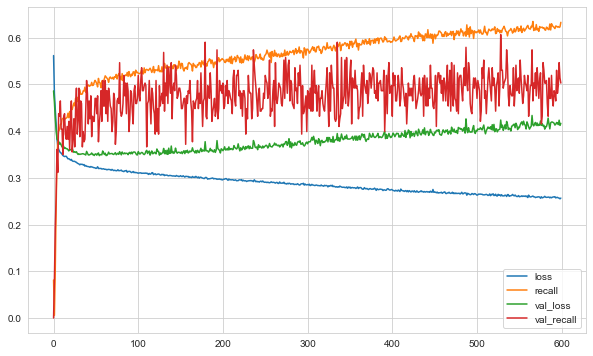

In [76]:
loss_df.plot();

In [77]:
model.evaluate(X_test, y_test, verbose=0)

[0.4671121835708618, 0.4852941036224365]

In [78]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[737  59]
 [105  99]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       796
           1       0.63      0.49      0.55       204

    accuracy                           0.84      1000
   macro avg       0.75      0.71      0.72      1000
weighted avg       0.82      0.84      0.83      1000



The predicted values are obtained by comparing the predicted probabilities with a threshold value of 0.5. If the predicted probability is greater than 0.5, the corresponding prediction is considered as 1 (or positive); otherwise, it is considered as 0 (or negative).

***Early Stoping***

In [79]:
tf.keras.utils.set_random_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [80]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25, restore_best_weights = True)

In [81]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=600,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/600
254/254 [==============================] - 1s 2ms/step - loss: 0.5009 - accuracy: 0.7851 - val_loss: 0.4592 - val_accuracy: 0.7989
Epoch 2/600
254/254 [==============================] - 0s 2ms/step - loss: 0.4503 - accuracy: 0.8053 - val_loss: 0.4348 - val_accuracy: 0.8167
Epoch 3/600
254/254 [==============================] - 0s 1ms/step - loss: 0.4221 - accuracy: 0.8183 - val_loss: 0.4036 - val_accuracy: 0.8311
Epoch 4/600
254/254 [==============================] - 0s 1ms/step - loss: 0.3953 - accuracy: 0.8335 - val_loss: 0.3899 - val_accuracy: 0.8367
Epoch 5/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3733 - accuracy: 0.8448 - val_loss: 0.3815 - val_accuracy: 0.8411
Epoch 6/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3645 - accuracy: 0.8505 - val_loss: 0.3727 - val_accuracy: 0.8422
Epoch 7/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3605 - accuracy: 0.8498 - val_loss: 0.3806 - val_accuracy: 0.8367

In [84]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,accuracy,val_loss,val_accuracy
0,0.501,0.785,0.459,0.799
1,0.450,0.805,0.435,0.817
2,0.422,0.818,0.404,0.831
3,0.395,0.833,0.390,0.837
4,0.373,0.845,0.382,0.841
...,...,...,...,...
100,0.312,0.871,0.346,0.862
101,0.311,0.871,0.335,0.870
102,0.310,0.873,0.339,0.857
103,0.309,0.871,0.343,0.859


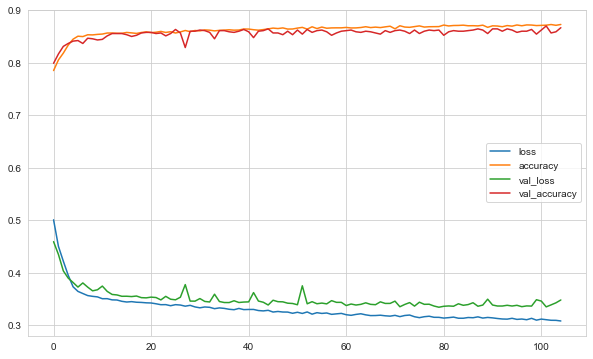

In [85]:
loss_df.plot()
plt.show()

In [86]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.35066086053848267
recall :  0.859000027179718


-Lower loss values indicate better performance, as they indicate a smaller deviation between predicted and actual values.

-Higher recall values indicate better performance in correctly identifying the positive class.

In [87]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[760  36]
 [105  99]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       796
           1       0.73      0.49      0.58       204

    accuracy                           0.86      1000
   macro avg       0.81      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000



### Evaluate The Model

In [88]:
from sklearn import datasets, metrics, model_selection
from sklearn.metrics import roc_auc_score

In [89]:
metrics.roc_auc_score

<function sklearn.metrics._ranking.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)>

32/32 [==============================] - 0s 1ms/step


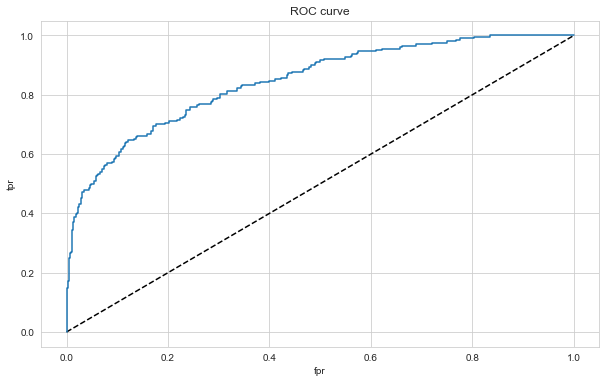

In [90]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [91]:
roc_auc_score(y_test, y_pred_proba)

0.8451879495516799

a ROC AUC score of 0.8452 > ANN model has good discriminative power and is effective in distinguishing between the positive and negative classes

## with class_weigth

In [92]:
from sklearn.utils import class_weight

In [93]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(9, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [96]:
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.627906976744186, 1: 2.4545454545454546}

The model will pay more attention to correctly classifying instances of class 1 due to its higher weight.

In [97]:
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_val, y_val),
          batch_size= 75,
          epochs=600,
          verbose=1,
         class_weight=class_weights
         )

Epoch 1/600
108/108 [==============================] - 1s 3ms/step - loss: 0.6862 - recall: 0.3285 - val_loss: 0.6606 - val_recall: 0.6557
Epoch 2/600
108/108 [==============================] - 0s 1ms/step - loss: 0.6599 - recall: 0.5970 - val_loss: 0.6437 - val_recall: 0.6940
Epoch 3/600
108/108 [==============================] - 0s 1ms/step - loss: 0.6370 - recall: 0.6545 - val_loss: 0.6230 - val_recall: 0.7322
Epoch 4/600
108/108 [==============================] - 0s 1ms/step - loss: 0.6167 - recall: 0.6830 - val_loss: 0.6266 - val_recall: 0.7814
Epoch 5/600
108/108 [==============================] - 0s 1ms/step - loss: 0.6035 - recall: 0.6855 - val_loss: 0.6147 - val_recall: 0.7814
Epoch 6/600
108/108 [==============================] - 0s 1ms/step - loss: 0.5928 - recall: 0.7000 - val_loss: 0.5855 - val_recall: 0.7104
Epoch 7/600
108/108 [==============================] - 0s 1ms/step - loss: 0.5896 - recall: 0.6970 - val_loss: 0.5698 - val_recall: 0.6940
Epoch 8/600
108/108 [======

In [98]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,recall,val_loss,val_recall
0,0.686,0.328,0.661,0.656
1,0.660,0.597,0.644,0.694
2,0.637,0.655,0.623,0.732
3,0.617,0.683,0.627,0.781
4,0.604,0.685,0.615,0.781
...,...,...,...,...
595,0.429,0.782,0.443,0.798
596,0.426,0.781,0.515,0.842
597,0.427,0.782,0.427,0.765
598,0.427,0.778,0.449,0.787


## Evaluate The Model

In [104]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.42212826013565063
recall :  0.6470588445663452


In [105]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[673 123]
 [ 72 132]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       796
           1       0.52      0.65      0.58       204

    accuracy                           0.81      1000
   macro avg       0.71      0.75      0.72      1000
weighted avg       0.82      0.81      0.81      1000



32/32 [==============================] - 0s 1ms/step


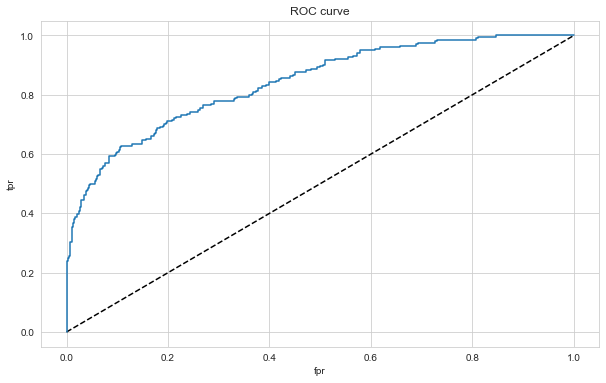

In [106]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [107]:
roc_auc_score(y_test, y_pred_proba)

0.840864863533353

## Implementation Different Methods to Develop The Model

### Increase The Learning Rate and Observe The Results

In [108]:
from tensorflow.keras.optimizers import Adam

In [109]:
tf.keras.utils.set_random_seed(42)


model = Sequential()

model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(9, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate=  0.003)

In [110]:
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [111]:
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_val, y_val),
          batch_size= 75,
          epochs=600,
          verbose=1)

Epoch 1/600
108/108 [==============================] - 1s 3ms/step - loss: 0.6030 - recall: 0.1079 - val_loss: 0.4911 - val_recall: 0.0000e+00
Epoch 2/600
108/108 [==============================] - 0s 2ms/step - loss: 0.4799 - recall: 0.0000e+00 - val_loss: 0.4592 - val_recall: 0.0109
Epoch 3/600
108/108 [==============================] - 0s 1ms/step - loss: 0.4564 - recall: 0.0376 - val_loss: 0.4392 - val_recall: 0.1803
Epoch 4/600
108/108 [==============================] - 0s 1ms/step - loss: 0.4420 - recall: 0.1321 - val_loss: 0.4261 - val_recall: 0.1530
Epoch 5/600
108/108 [==============================] - 0s 1ms/step - loss: 0.4339 - recall: 0.1855 - val_loss: 0.4202 - val_recall: 0.3333
Epoch 6/600
108/108 [==============================] - 0s 1ms/step - loss: 0.4194 - recall: 0.2255 - val_loss: 0.4049 - val_recall: 0.2787
Epoch 7/600
108/108 [==============================] - 0s 1ms/step - loss: 0.4094 - recall: 0.2739 - val_loss: 0.3945 - val_recall: 0.2787
Epoch 8/600
108/108

In [112]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.603,0.108,0.491,0.000
1,0.480,0.000,0.459,0.011
2,0.456,0.038,0.439,0.180
3,0.442,0.132,0.426,0.153
4,0.434,0.185,0.420,0.333


In [113]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.3944993019104004
recall :  0.46568626165390015


In [114]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[758  38]
 [109  95]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       796
           1       0.71      0.47      0.56       204

    accuracy                           0.85      1000
   macro avg       0.79      0.71      0.74      1000
weighted avg       0.84      0.85      0.84      1000



### Add Dropout Layer

In [115]:
from tensorflow.keras.layers import Dropout

In [116]:
tf.keras.utils.set_random_seed(42)

model = Sequential()

model.add(Dense(18, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(4, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate = 0.002)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [117]:
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_val, y_val),
          batch_size= 75,
          epochs=600,
          verbose=1)

Epoch 1/600
108/108 [==============================] - 2s 3ms/step - loss: 0.6629 - recall: 0.1588 - val_loss: 0.5966 - val_recall: 0.0000e+00
Epoch 2/600
108/108 [==============================] - 0s 2ms/step - loss: 0.5378 - recall: 0.0012 - val_loss: 0.4868 - val_recall: 0.0000e+00
Epoch 3/600
108/108 [==============================] - 0s 2ms/step - loss: 0.5121 - recall: 0.0000e+00 - val_loss: 0.4644 - val_recall: 0.0000e+00
Epoch 4/600
108/108 [==============================] - 0s 2ms/step - loss: 0.4989 - recall: 0.0000e+00 - val_loss: 0.4644 - val_recall: 0.0000e+00
Epoch 5/600
108/108 [==============================] - 0s 2ms/step - loss: 0.4900 - recall: 0.0000e+00 - val_loss: 0.4541 - val_recall: 0.0000e+00
Epoch 6/600
108/108 [==============================] - 0s 1ms/step - loss: 0.4838 - recall: 6.0606e-04 - val_loss: 0.4478 - val_recall: 0.0000e+00
Epoch 7/600
108/108 [==============================] - 0s 2ms/step - loss: 0.4777 - recall: 0.0085 - val_loss: 0.4396 - val_re

In [118]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.663,0.159,0.597,0.000
1,0.538,0.001,0.487,0.000
2,0.512,0.000,0.464,0.000
3,0.499,0.000,0.464,0.000
4,0.490,0.000,0.454,0.000


In [119]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.35721081495285034
recall :  0.38725489377975464


In [120]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[783  13]
 [125  79]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       796
           1       0.86      0.39      0.53       204

    accuracy                           0.86      1000
   macro avg       0.86      0.69      0.73      1000
weighted avg       0.86      0.86      0.84      1000



### Add Early Stop 

In [121]:
from tensorflow.keras.callbacks import EarlyStopping

In [122]:
early_stop = EarlyStopping(monitor = "val_loss",
                           mode = "min",
                           verbose = 1,
                           patience = 15,
                           restore_best_weights = True)

In [123]:
tf.keras.utils.set_random_seed(42)

model = Sequential()

model.add(Dense(18, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(9, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [124]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=75,
    epochs=600,
    verbose=1,
    callbacks=[early_stop],
    class_weight=class_weights
)

Epoch 1/600
108/108 [==============================] - 1s 3ms/step - loss: 0.6885 - recall: 0.9467 - val_loss: 0.7094 - val_recall: 0.9016
Epoch 2/600
108/108 [==============================] - 0s 2ms/step - loss: 0.6652 - recall: 0.7739 - val_loss: 0.6956 - val_recall: 0.7705
Epoch 3/600
108/108 [==============================] - 0s 2ms/step - loss: 0.6334 - recall: 0.6885 - val_loss: 0.6135 - val_recall: 0.6721
Epoch 4/600
108/108 [==============================] - 0s 2ms/step - loss: 0.6081 - recall: 0.6697 - val_loss: 0.6192 - val_recall: 0.7322
Epoch 5/600
108/108 [==============================] - 0s 2ms/step - loss: 0.5905 - recall: 0.6824 - val_loss: 0.5986 - val_recall: 0.7268
Epoch 6/600
108/108 [==============================] - 0s 2ms/step - loss: 0.5733 - recall: 0.7000 - val_loss: 0.5758 - val_recall: 0.7104
Epoch 7/600
108/108 [==============================] - 0s 2ms/step - loss: 0.5620 - recall: 0.7097 - val_loss: 0.5475 - val_recall: 0.7049
Epoch 8/600
108/108 [======

In [125]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.688,0.947,0.709,0.902
1,0.665,0.774,0.696,0.770
2,0.633,0.688,0.613,0.672
3,0.608,0.670,0.619,0.732
4,0.590,0.682,0.599,0.727


In [126]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.42233577370643616
recall :  0.6274510025978088


In [127]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[680 116]
 [ 76 128]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       796
           1       0.52      0.63      0.57       204

    accuracy                           0.81      1000
   macro avg       0.71      0.74      0.72      1000
weighted avg       0.82      0.81      0.81      1000



#### Monitor the "val_recall" as metric

In [128]:
early_stop = EarlyStopping(monitor = "val_recall",
                           mode = "min",
                           verbose = 1,
                           patience = 15,
                           restore_best_weights = True)

In [129]:
tf.keras.utils.set_random_seed(42)

model = Sequential()

model.add(Dense(18, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(9, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [130]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=75,
    epochs=500,
    verbose=1,
    callbacks=[early_stop],
    class_weight=class_weights
)

Epoch 1/500
108/108 [==============================] - 1s 3ms/step - loss: 0.6885 - recall: 0.9467 - val_loss: 0.7094 - val_recall: 0.9016
Epoch 2/500
108/108 [==============================] - 0s 2ms/step - loss: 0.6652 - recall: 0.7739 - val_loss: 0.6956 - val_recall: 0.7705
Epoch 3/500
108/108 [==============================] - 0s 2ms/step - loss: 0.6334 - recall: 0.6885 - val_loss: 0.6135 - val_recall: 0.6721
Epoch 4/500
108/108 [==============================] - 0s 1ms/step - loss: 0.6081 - recall: 0.6697 - val_loss: 0.6192 - val_recall: 0.7322
Epoch 5/500
108/108 [==============================] - 0s 1ms/step - loss: 0.5905 - recall: 0.6824 - val_loss: 0.5986 - val_recall: 0.7268
Epoch 6/500
108/108 [==============================] - 0s 1ms/step - loss: 0.5733 - recall: 0.7000 - val_loss: 0.5758 - val_recall: 0.7104
Epoch 7/500
108/108 [==============================] - 0s 1ms/step - loss: 0.5620 - recall: 0.7097 - val_loss: 0.5475 - val_recall: 0.7049
Epoch 8/500
108/108 [======

In [131]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.688,0.947,0.709,0.902
1,0.665,0.774,0.696,0.770
2,0.633,0.688,0.613,0.672
3,0.608,0.670,0.619,0.732
4,0.590,0.682,0.599,0.727


In [132]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.5127308964729309
recall :  0.6470588445663452


In [133]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[616 180]
 [ 72 132]]
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       796
           1       0.42      0.65      0.51       204

    accuracy                           0.75      1000
   macro avg       0.66      0.71      0.67      1000
weighted avg       0.80      0.75      0.77      1000



## Optuna

In [134]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [136]:
import optuna
from tensorflow.keras.regularizers import l1, l2, L1L2

In [137]:
early_stop = EarlyStopping(monitor = "val_recall",
                           mode = "min",
                           verbose = 1,
                           patience = 25,
                           restore_best_weights = True)

In [138]:
trial_metric = "Recall"
batch_size = 64

In [139]:
def create_model(trial):

    n_units1 = trial.suggest_int("n_units1", 64, 128)
    n_units2 = trial.suggest_int("n_units2", 16, 64)
    n_units3 = trial.suggest_int("n_units3", 16, 64)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1)
    regularizer1 = trial.suggest_loguniform("regularizer1", 1e-5, 1e-3)
    regularizer2 = trial.suggest_loguniform("regularizer2", 1e-5, 1e-3)
    dropout = trial.suggest_categorical("dropout",[0, .3, .5])
    
    
    tf.keras.utils.set_random_seed(42)
    model = Sequential()
    model.add(Dense(n_units1,
                    activation="relu",
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2),
                    bias_regularizer=l2(regularizer2),
                    activity_regularizer=l1(regularizer2),
                    input_dim=X_train.shape[1],))
    model.add(Dropout(dropout))
    model.add(Dense(n_units2,
                    activation="relu",
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2),
                    bias_regularizer=l2(regularizer2),
                    activity_regularizer=l1(regularizer2)))
    model.add(Dropout(dropout))
    model.add(Dense(n_units3,
                    activation="relu",
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2),
                    bias_regularizer=l2(regularizer2),
                    activity_regularizer=l1(regularizer2)))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation="sigmoid"))
    
    
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric]
    )


    return model

def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 2)

    model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=700,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    return model.evaluate(X_test, y_test, verbose=0)[1]

In [140]:
study = optuna.create_study(direction="maximize")
study.optimize(objective  , n_trials=15)
display(study.best_params)

[I 2023-10-30 21:26:52,439] A new study created in memory with name: no-name-57dc2684-0bbb-48de-b81d-94c134444897


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-10-30 21:27:00,329] Trial 0 finished with value: 0.0 and parameters: {'n_units1': 68, 'n_units2': 26, 'n_units3': 37, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.00027342693103023507, 'regularizer1': 0.0005703584425953789, 'regularizer2': 1.2360250497137874e-05, 'dropout': 0.5, 'w0': 0.6018205137635021, 'w1': 0.020631183497452743}. Best is trial 0 with value: 0.0.


Restoring model weights from the end of the best epoch: 4.
Epoch 29: early stopping


[I 2023-10-30 21:27:09,261] Trial 1 finished with value: 0.8284313678741455 and parameters: {'n_units1': 113, 'n_units2': 39, 'n_units3': 19, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.00882972746544598, 'regularizer1': 1.0074216396761975e-05, 'regularizer2': 3.868385354032231e-05, 'dropout': 0.5, 'w0': 0.07233804512418074, 'w1': 1.00391982306836}. Best is trial 1 with value: 0.8284313678741455.


Restoring model weights from the end of the best epoch: 104.
Epoch 129: early stopping


[I 2023-10-30 21:27:39,211] Trial 2 finished with value: 0.0 and parameters: {'n_units1': 98, 'n_units2': 17, 'n_units3': 19, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0005485720275784571, 'regularizer1': 6.246572230484227e-05, 'regularizer2': 1.003900804369274e-05, 'dropout': 0.5, 'w0': 2.407679616500655, 'w1': 1.2962129214353804}. Best is trial 1 with value: 0.8284313678741455.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-10-30 21:27:46,485] Trial 3 finished with value: 0.9901960492134094 and parameters: {'n_units1': 114, 'n_units2': 53, 'n_units3': 56, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 5.829301229976929e-05, 'regularizer1': 0.00015329677787873623, 'regularizer2': 0.00020514863442740595, 'dropout': 0, 'w0': 0.010190042729723908, 'w1': 0.05164148610313577}. Best is trial 3 with value: 0.9901960492134094.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-10-30 21:27:53,764] Trial 4 finished with value: 1.0 and parameters: {'n_units1': 68, 'n_units2': 19, 'n_units3': 63, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 3.232625140825702e-05, 'regularizer1': 0.00034480426628412755, 'regularizer2': 0.0006755104194428645, 'dropout': 0.3, 'w0': 0.054414476940515315, 'w1': 0.24515923239145387}. Best is trial 4 with value: 1.0.


Restoring model weights from the end of the best epoch: 112.
Epoch 137: early stopping


[I 2023-10-30 21:28:26,692] Trial 5 finished with value: 0.04901960864663124 and parameters: {'n_units1': 104, 'n_units2': 25, 'n_units3': 45, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 3.026939360044631e-05, 'regularizer1': 1.6448170013285275e-05, 'regularizer2': 0.0006861807383501858, 'dropout': 0.3, 'w0': 2.6053621350454015, 'w1': 0.7945276403798381}. Best is trial 4 with value: 1.0.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-10-30 21:28:33,953] Trial 6 finished with value: 0.0 and parameters: {'n_units1': 105, 'n_units2': 31, 'n_units3': 53, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.008303665337708403, 'regularizer1': 0.0006576113324780217, 'regularizer2': 5.8405126083817744e-05, 'dropout': 0, 'w0': 0.07060604967100113, 'w1': 0.013077056935774439}. Best is trial 4 with value: 1.0.


Restoring model weights from the end of the best epoch: 4.
Epoch 29: early stopping


[I 2023-10-30 21:28:41,213] Trial 7 finished with value: 0.0049019609577953815 and parameters: {'n_units1': 119, 'n_units2': 36, 'n_units3': 23, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.008258399726553515, 'regularizer1': 1.2447537375118034e-05, 'regularizer2': 0.0005568172674668423, 'dropout': 0, 'w0': 1.1084464173908408, 'w1': 0.34670984411030165}. Best is trial 4 with value: 1.0.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-10-30 21:28:49,637] Trial 8 finished with value: 1.0 and parameters: {'n_units1': 74, 'n_units2': 48, 'n_units3': 50, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0037015684787847372, 'regularizer1': 0.00010990907944087342, 'regularizer2': 1.6221820721131802e-05, 'dropout': 0.5, 'w0': 0.06290486362228528, 'w1': 1.105587583747399}. Best is trial 4 with value: 1.0.


Restoring model weights from the end of the best epoch: 3.
Epoch 28: early stopping


[I 2023-10-30 21:28:56,908] Trial 9 finished with value: 0.019607843831181526 and parameters: {'n_units1': 65, 'n_units2': 45, 'n_units3': 41, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.03249246756302406, 'regularizer1': 3.424744655390023e-05, 'regularizer2': 1.2966327074412648e-05, 'dropout': 0.3, 'w0': 0.956015938092013, 'w1': 1.5399489990969457}. Best is trial 4 with value: 1.0.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-10-30 21:29:04,200] Trial 10 finished with value: 0.0049019609577953815 and parameters: {'n_units1': 83, 'n_units2': 63, 'n_units3': 61, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 1.202679293051871e-05, 'regularizer1': 0.0003298558289339328, 'regularizer2': 0.0009740042714786731, 'dropout': 0.3, 'w0': 0.22817579274844804, 'w1': 0.14315274974515926}. Best is trial 4 with value: 1.0.


Restoring model weights from the end of the best epoch: 62.
Epoch 87: early stopping


[I 2023-10-30 21:29:22,586] Trial 11 finished with value: 0.6372548937797546 and parameters: {'n_units1': 81, 'n_units2': 48, 'n_units3': 64, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0019238535746405028, 'regularizer1': 0.00017609479709280592, 'regularizer2': 0.00020182522148222347, 'dropout': 0.3, 'w0': 0.05306493184984138, 'w1': 0.3391779272908755}. Best is trial 4 with value: 1.0.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-10-30 21:29:29,444] Trial 12 finished with value: 0.29901960492134094 and parameters: {'n_units1': 80, 'n_units2': 57, 'n_units3': 50, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.00024496108021664363, 'regularizer1': 0.00025414846125087863, 'regularizer2': 2.6583391497597832e-05, 'dropout': 0.5, 'w0': 0.02042597520763106, 'w1': 0.39349757683864}. Best is trial 4 with value: 1.0.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-10-30 21:29:36,908] Trial 13 finished with value: 0.0 and parameters: {'n_units1': 74, 'n_units2': 17, 'n_units3': 36, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0013779373095417844, 'regularizer1': 0.00010458719369470014, 'regularizer2': 0.00011020929181638886, 'dropout': 0.5, 'w0': 0.16966875690540884, 'w1': 0.13300677847894093}. Best is trial 4 with value: 1.0.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-10-30 21:29:44,519] Trial 14 finished with value: 1.0 and parameters: {'n_units1': 89, 'n_units2': 46, 'n_units3': 58, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.00010587814908687775, 'regularizer1': 0.00039265225385692794, 'regularizer2': 0.0003229296778491666, 'dropout': 0.3, 'w0': 0.036405056963866214, 'w1': 0.6062419077008606}. Best is trial 4 with value: 1.0.


{'n_units1': 68,
 'n_units2': 19,
 'n_units3': 63,
 'optimizer': keras.src.optimizers.adadelta.Adadelta,
 'learning_rate': 3.232625140825702e-05,
 'regularizer1': 0.00034480426628412755,
 'regularizer2': 0.0006755104194428645,
 'dropout': 0.3,
 'w0': 0.054414476940515315,
 'w1': 0.24515923239145387}

In [141]:
unit1, unit2, unit3, optimizer, lr, lreg1, lreg2, dropout_rate, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["n_units3"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["regularizer1"],
    study.best_params["regularizer2"],
    study.best_params["dropout"],
    study.best_params["w0"],
    study.best_params["w1"],
)

In [142]:
tf.keras.utils.set_random_seed(42)
model = Sequential()
model.add(Dense(unit1,
                activation="relu",
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2),
                bias_regularizer=l2(lreg2),
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))
model.add(Dense(unit2,
                activation="relu",
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2),
                bias_regularizer=l2(lreg2),
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))
model.add(Dense(unit3,
                activation="relu",
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2),
                bias_regularizer=l2(lreg2),
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))

model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [143]:
model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=75,
    epochs=700,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/700
108/108 [==============================] - 1s 4ms/step - loss: 0.9795 - recall: 0.9618 - val_loss: 0.9608 - val_recall: 1.0000
Epoch 2/700
108/108 [==============================] - 0s 2ms/step - loss: 0.9778 - recall: 0.9630 - val_loss: 0.9608 - val_recall: 1.0000
Epoch 3/700
108/108 [==============================] - 0s 2ms/step - loss: 0.9778 - recall: 0.9655 - val_loss: 0.9607 - val_recall: 1.0000
Epoch 4/700
108/108 [==============================] - 0s 2ms/step - loss: 0.9777 - recall: 0.9648 - val_loss: 0.9607 - val_recall: 1.0000
Epoch 5/700
108/108 [==============================] - 0s 2ms/step - loss: 0.9767 - recall: 0.9636 - val_loss: 0.9606 - val_recall: 1.0000
Epoch 6/700
108/108 [==============================] - 0s 2ms/step - loss: 0.9790 - recall: 0.9624 - val_loss: 0.9605 - val_recall: 1.0000
Epoch 7/700
108/108 [==============================] - 0s 2ms/step - loss: 0.9794 - recall: 0.9642 - val_loss: 0.9605 - val_recall: 1.0000
Epoch 8/700
108/108 [======

### Evaluate The Model

In [154]:
loss_df = pd.DataFrame(model.history.history)

In [155]:
loss_df

""


In [145]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[  0 796]
 [  0 204]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       796
           1       0.20      1.00      0.34       204

    accuracy                           0.20      1000
   macro avg       0.10      0.50      0.17      1000
weighted avg       0.04      0.20      0.07      1000



32/32 [==============================] - 0s 1ms/step


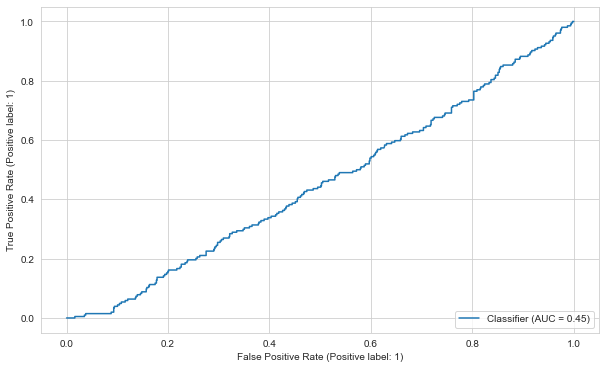

In [151]:
from sklearn import metrics
y_pred_proba = model.predict(X_test)
metrics.RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [152]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.9598683714866638
recall:  1.0


In [153]:
roc_auc_score(y_test, y_pred_proba)

0.4527816779978323

## Final Model and Model Deployment

In [156]:
import pickle

pickle.dump(scaler, open("scaler_exited", 'wb'))

In [157]:
#Model Architecture
final_model = Sequential()

final_model.add(Dense(32, activation = "relu"))
final_model.add(Dense(16, activation = "relu"))
final_model.add(Dense(1, activation = "sigmoid"))

#Model Compilation
opt = Adam(lr = 0.001)

final_model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

#The "Recall" metric is specified to monitor the model's performance during training,
#which indicates the model's ability to correctly identify positive instances.

In [158]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 20)

In [159]:
#To address class imbalance
class_weight = {0: 0.627906976744186, 1: 2.4545454545454546} #class weights dictionary that I previously computed

In [160]:
final_model.fit(x = X_train, y = y_train,
                validation_data = (X_test, y_test),
                batch_size = 32,
                epochs = 1000,
                verbose = 1,
                callbacks = [early_stop],
                class_weight = class_weight)

Epoch 1/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.6606 - recall: 0.6297 - val_loss: 0.6552 - val_recall: 0.6961
Epoch 2/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.6170 - recall: 0.6533 - val_loss: 0.6343 - val_recall: 0.7206
Epoch 3/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5870 - recall: 0.6739 - val_loss: 0.5981 - val_recall: 0.7108
Epoch 4/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5648 - recall: 0.6952 - val_loss: 0.5134 - val_recall: 0.6275
Epoch 5/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5434 - recall: 0.7164 - val_loss: 0.4816 - val_recall: 0.6225
Epoch 6/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5180 - recall: 0.7267 - val_loss: 0.5445 - val_recall: 0.7451
Epoch 7/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5067 - recall: 0.7376 - val_loss: 0.4761 - val_recall: 0.6569
Epoch 8/1000
254/254

In [161]:
loss_df = pd.DataFrame(final_model.history.history)

In [162]:
y_pred = (final_model.predict(X_test) > 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[635 161]
 [ 61 143]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       796
           1       0.47      0.70      0.56       204

    accuracy                           0.78      1000
   macro avg       0.69      0.75      0.71      1000
weighted avg       0.82      0.78      0.79      1000



In [164]:
model.save('deep_classifier.h5')

Implements a sequential model, compiles it with appropriate settings, and trains it using specified data and training parameters. The early stopping and class weights aim to improve model performance and handle class imbalance in the training data.

## Prediction

In [163]:
from tensorflow.keras.models import load_model

In [165]:
model_exited = load_model('deep_classifier.h5')

scaler_exited = pickle.load(open("scaler_exited", "rb"))

In [168]:
random_customer_segment= df.sample(n=8, random_state=101)

random_customer_segment

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6676,619,3,1,52,8,0.000,2,1,1,123242.110,0
6421,616,1,1,23,8,73112.950,1,1,1,62733.050,0
9834,516,1,0,46,6,62212.290,1,0,1,171681.860,1
8492,494,1,1,28,9,114731.760,2,0,1,79479.740,0
9982,655,2,0,46,7,137145.120,1,1,0,115146.400,1
8844,695,3,1,35,7,0.000,2,1,0,160387.980,0
7247,582,2,0,40,3,110150.430,1,1,1,191757.650,1
5862,682,1,1,40,4,0.000,2,1,1,140745.910,0


### conclusion

***The ANN has three layers***: the first two layers help the model understand patterns in customer data, and the last layer predicts whether a customer will churn or not.

To make **accurate predictions**, the model is trained using historical data on customer behavior. It learns to recognize patterns that indicate potential churn, such as changes in customer activity or purchase patterns.

To improve the model's performance, the training process is optimized using class weights. This ensures that the model pays more attention to the minority class (churned customers) and avoids biases towards the majority class.

The model is trained using the provided training data and evaluated using a separate validation dataset. Training continues until the model stops improving or reaches a maximum of 1000 training cycles. If the model doesn't show improvement for 20 consecutive cycles, training is stopped early to save time.